In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
WINDOW_SIZE = 200
REPETITION_DURATION = 150
DATA_CSV_PATH = 'data.csv'

In [3]:
df = pd.read_csv(DATA_CSV_PATH, sep=';')

x_data = df[['PITCH', 'ROLL', 'YAW']].values
y_data = df['FLAG'].values

# Replace single ones with sequences of ones
# Set to one if single window fully contains one repetiton
new_y_data = []
for i in range(len(y_data)):
    windowed_y_data = [y for y in y_data[i : i + WINDOW_SIZE]]
    is_window_contains_whole_rep = (
        any(element == 1 for element in windowed_y_data) and
        windowed_y_data.index(1) <= len(windowed_y_data) - REPETITION_DURATION
    )
    new_y_data.append(1 if is_window_contains_whole_rep else 0)

x_data = x_data[0:6700]
y_data = new_y_data[0:6700]

2182


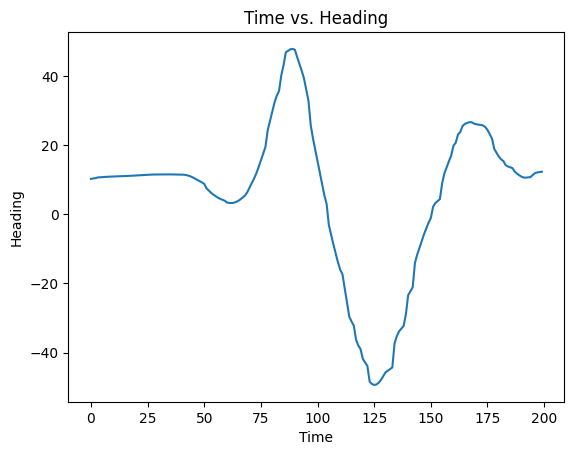

In [4]:
indexes = [i for i, element in enumerate(y_data) if element == 1]
random_win = random.choice(indexes)
print(random_win)
plt.plot([x[1] for x in x_data[random_win:random_win+WINDOW_SIZE]])
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title('Time vs. Heading')
plt.show()

In [5]:
x_train = []
y_train = []
for i in range(len(x_data) - WINDOW_SIZE + 1):
    window = x_data[i : i + WINDOW_SIZE]
    x_train.append(window)
    y_train.append(y_data[i])
    
x_train = np.array(x_train)
x_train = x_train.reshape(len(x_train), -1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9930822444273636


In [7]:
x_to_display = []
for i in range(len(x_data) - WINDOW_SIZE + 1):
    window = x_data[i : i + WINDOW_SIZE]
    x_to_display.append(window)
    
x_to_display = np.array(x_to_display)
x_to_display = x_to_display.reshape(len(x_to_display), -1)

In [8]:
preds = rf_classifier.predict(x_to_display)

In [9]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot([x[1] for x in x_data])
for i, pos in enumerate(preds):
    if pos == 1 and i % 20 == 0:
        ax.axvline(i, color="red")
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title('Time vs. Heading')
plt.show()

In [10]:
import joblib

In [11]:
joblib.dump(rf_classifier, 'model.joblib')

['model.joblib']